In [12]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
X=[]
Y1=[]
for i in range(100):
  X.append(i)
  Y1.append(math.sin(i))

In [0]:
Y2=[]
for i in range(100):
  Y2.append(math.cos(i))

In [0]:

inpt = np.column_stack((Y1, Y2))
tst = [Y1-Y2 for Y1,Y2 in zip(Y1,Y2)]

In [0]:
inpt = np.array(inpt, dtype="float32")
trgt = np.array(tst, dtype="float32")

In [8]:
inpt= np.array(inpt).reshape(100, 2,1)
inpt.shape

(100, 2, 1)

In [10]:
trgt.shape

(100,)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(inpt,trgt,test_size=0.2,random_state=4)

In [14]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(2,1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2, 200)            161600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 2, 100)            120400    
_________________________________________________________________
lstm_3 (LSTM)                (None, 2, 50)             30200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)            

In [15]:
history = model.fit(x_train,y_train,epochs=2000,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 80 samples, validate on 20 samples
Epoch 1/2000





80/80 [==============================] - 3s 42ms/step - loss: 1.0313 - val_loss: 0.8465
Epoch 2/2000
80/80 [==============================] - 0s 990us/step - loss: 1.0311 - val_loss: 0.8491
Epoch 3/2000
80/80 [==============================] - 0s 982us/step - loss: 1.0305 - val_loss: 0.8512
Epoch 4/2000
80/80 [==============================] - 0s 1ms/step - loss: 1.0299 - val_loss: 0.8529
Epoch 5/2000
80/80 [==============================] - 0s 943us/step - loss: 1.0300 - val_loss: 0.8543
Epoch 6/2000
80/80 [==============================] - 0s 948us/step - loss: 1.0294 - val_loss: 0.8544
Epoch 7/2000
80/80 [==============================] - 0s 987us/step - loss: 1.0292 - val_loss: 0.8550
Epoch 8/2000
80/80 [==============================] - 0s 949us/step - loss: 1.0292 - val_loss: 0.8561
Epoch 9/2000
80/80 [=====================

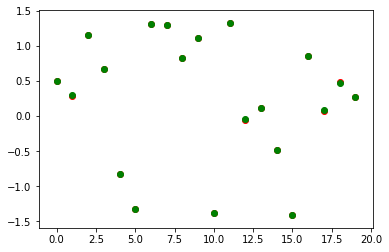

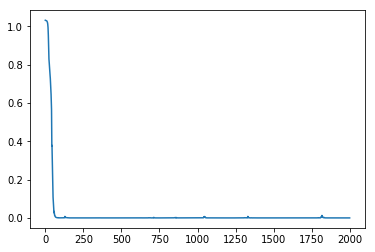

In [16]:
results = model.predict(x_test)
results.shape
y_test.shape
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()
plt.plot(history.history['loss'])
plt.show()